In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

url = "https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/06.%20Week%206/Dataset/clusteringcampaign.csv"
df = pd.read_csv(url, delimiter='\t')
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

None


Statistik Ringkasan:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000



Fitur Numerik: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Fitur Kategorikal: ['Education', 'Marital_Status', 'Dt_Customer']

Jumlah Nilai yang Hilang per Kolom:


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


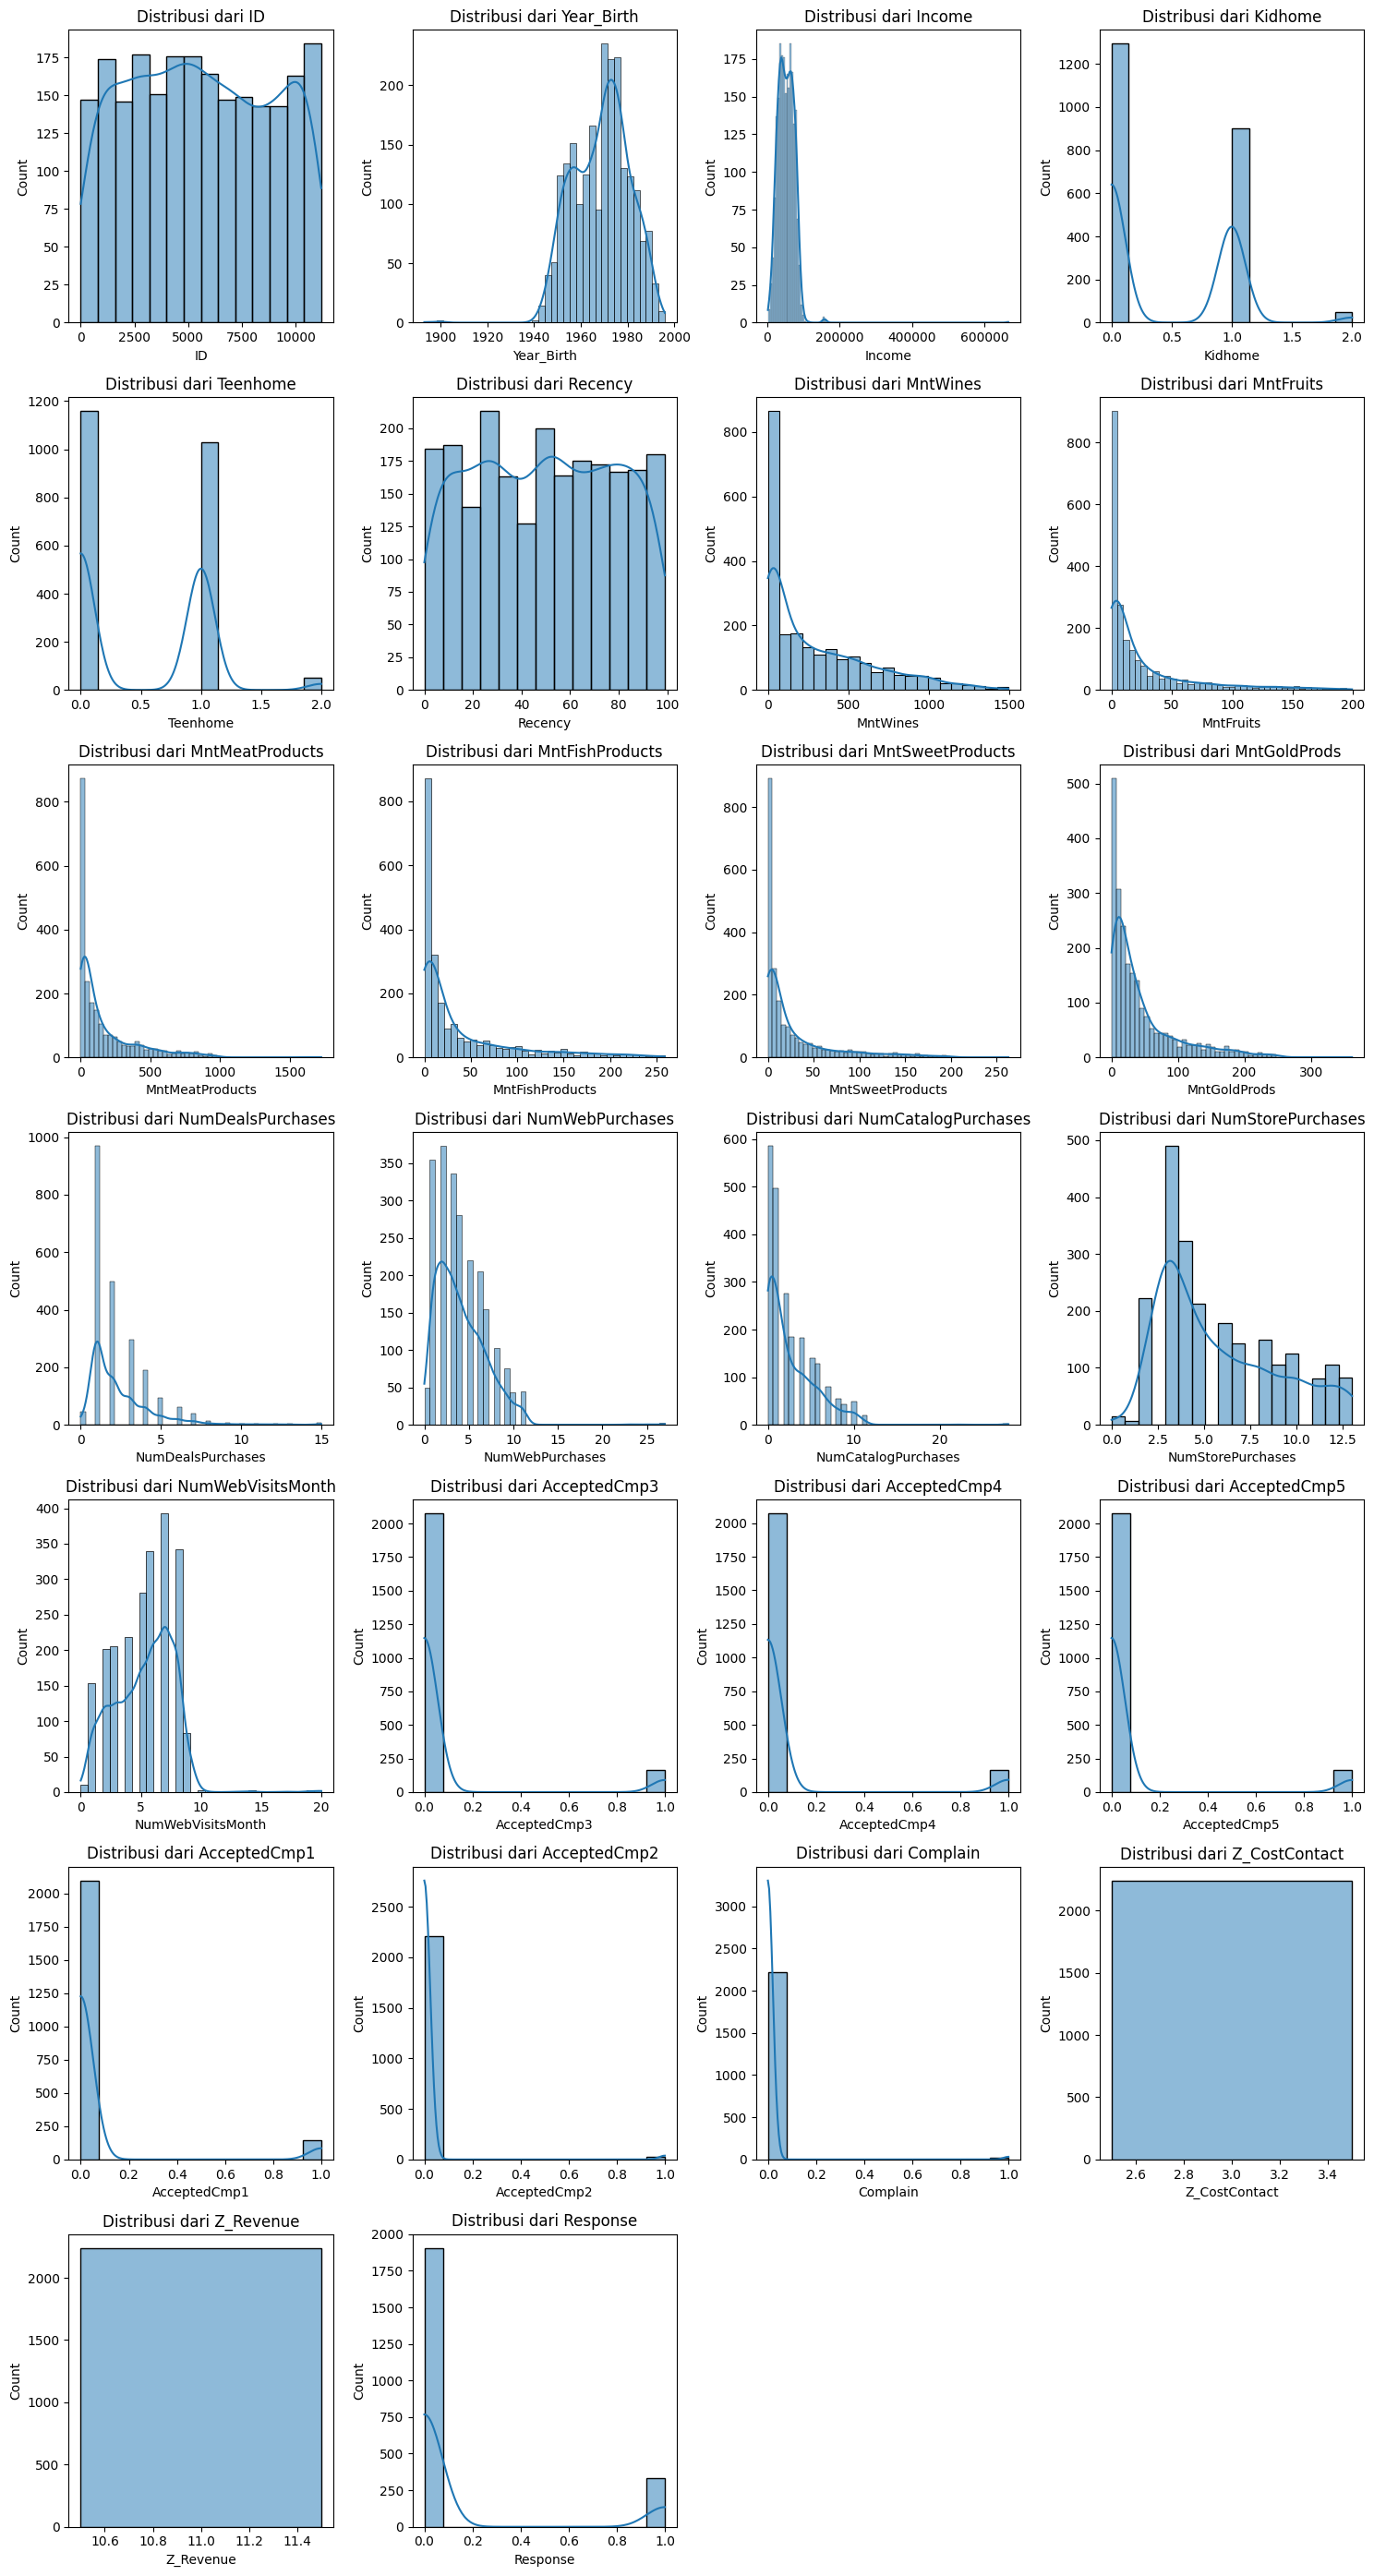

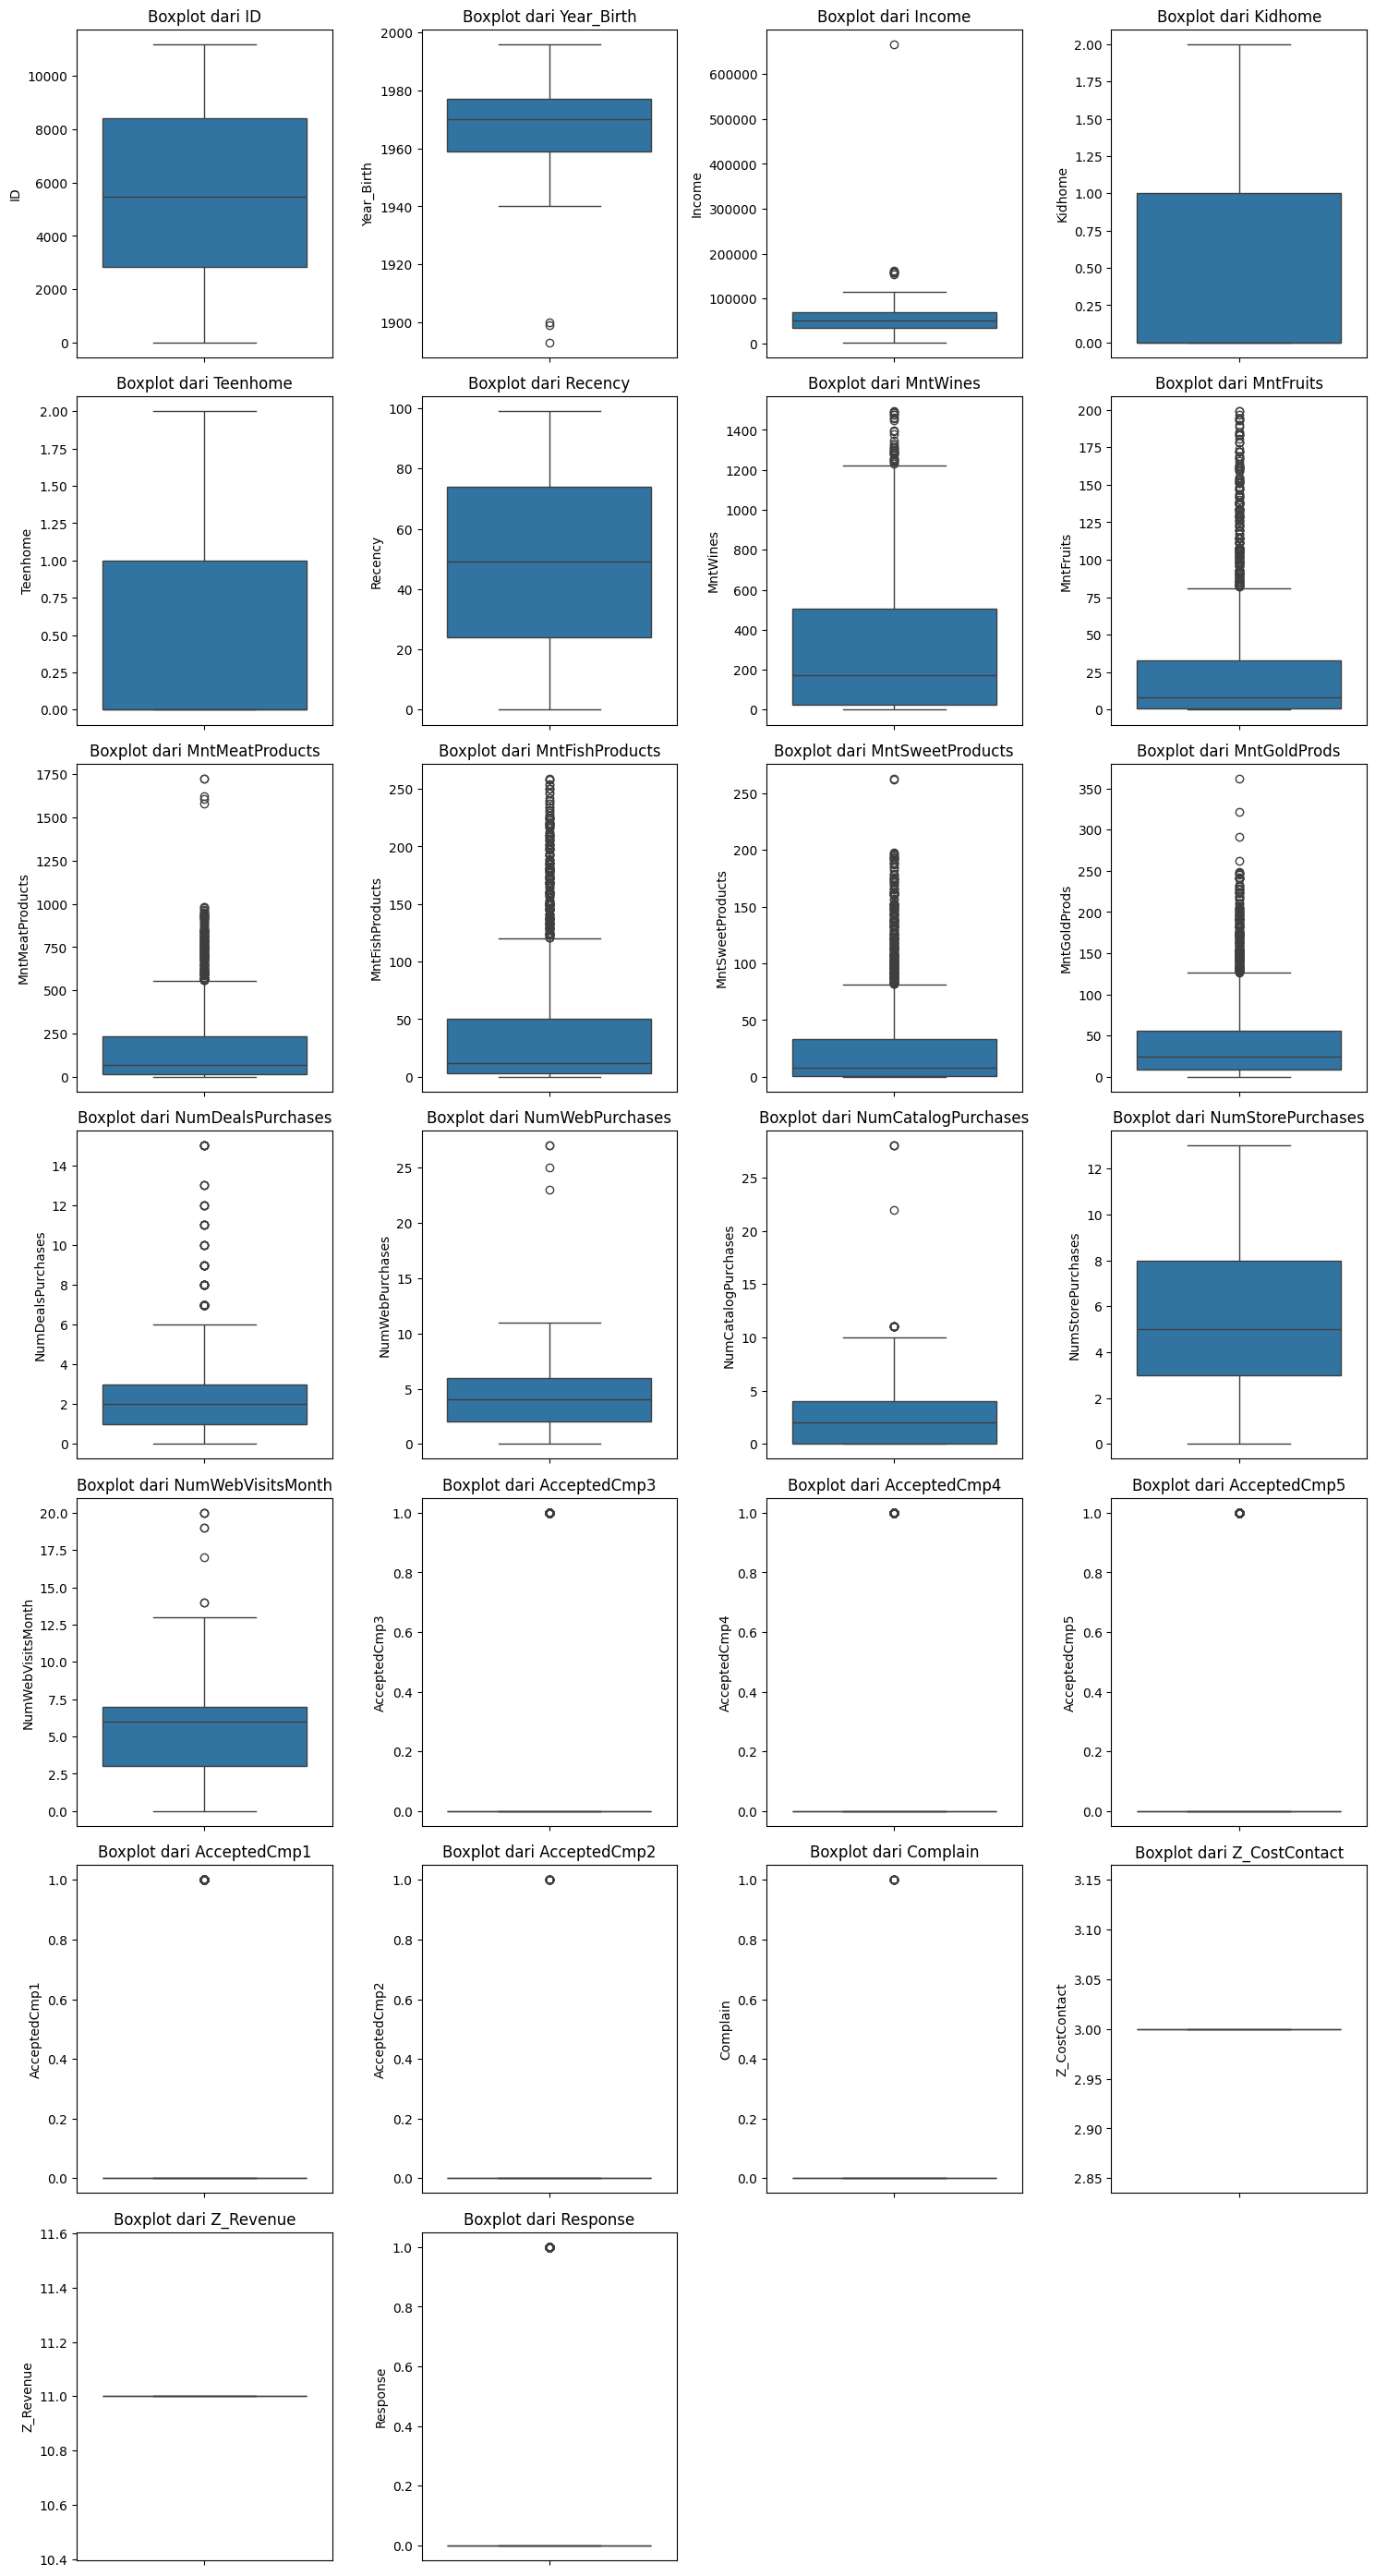

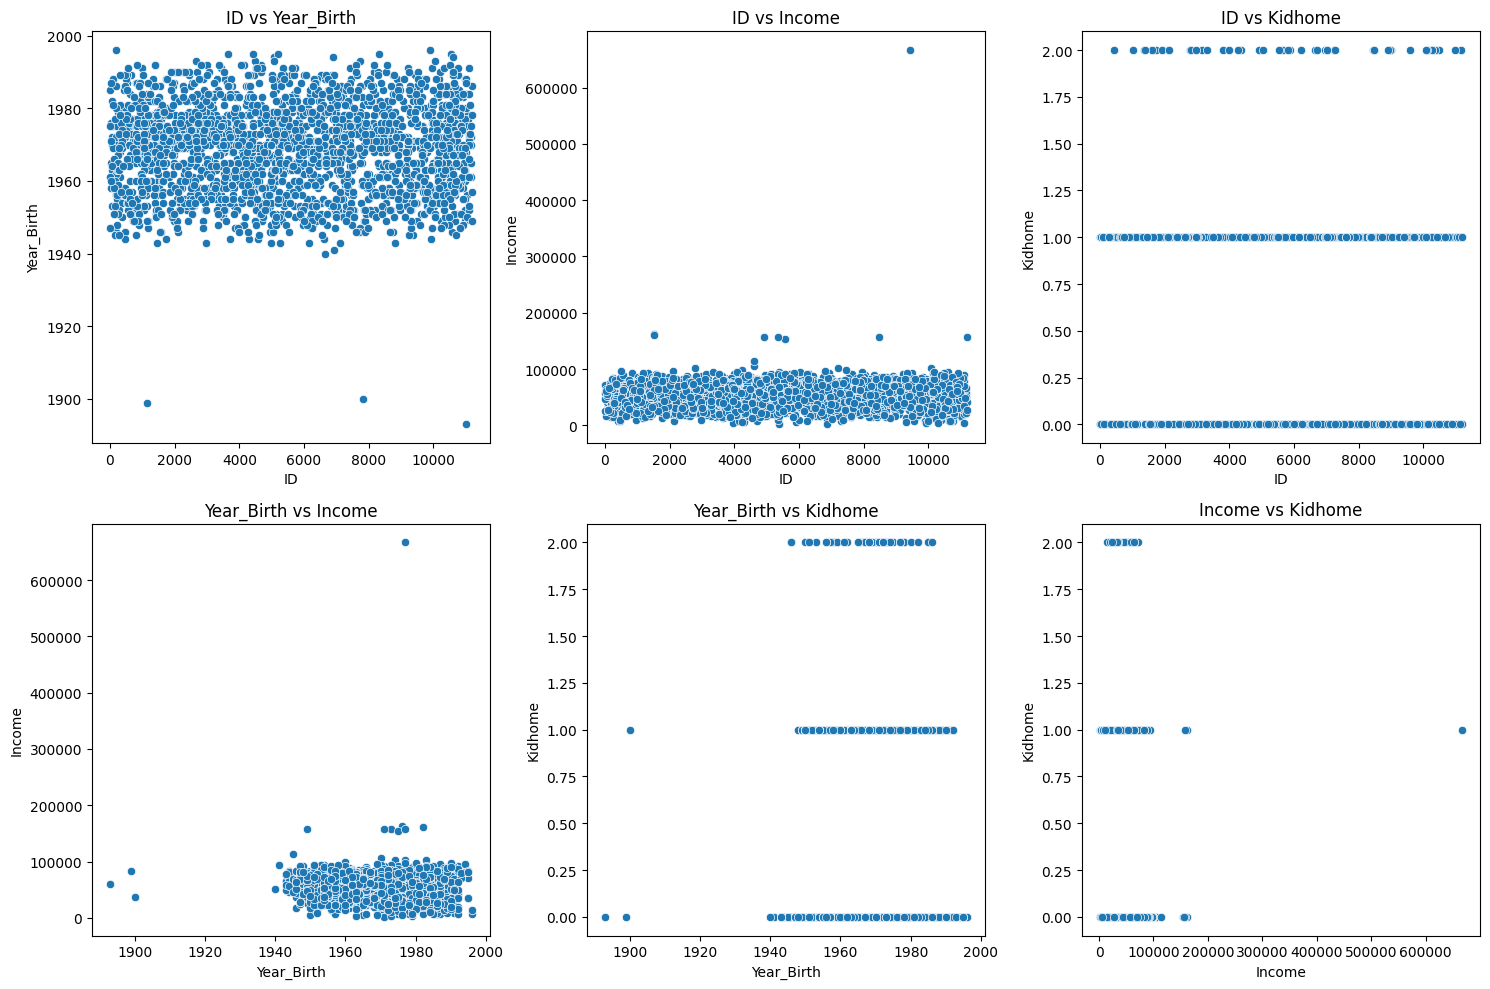

In [10]:
# Analisis Awal Data
print("Tipe Data:")
display(df.info())
print("\nStatistik Ringkasan:")
display(df.describe(include='all'))

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("\nFitur Numerik:", numerical_cols)
print("\nFitur Kategorikal:", categorical_cols)

# Pemeriksaan Nilai yang Hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
display(df.isnull().sum())

# Deteksi Outlier dengan Visualisasi (Histogram dan Boxplot)
# Menggunakan jumlah subplot yang sesuai dengan jumlah fitur numerik
n_numerical = len(numerical_cols)
n_cols_hist = 4
n_rows_hist = (n_numerical + n_cols_hist - 1) // n_cols_hist

plt.figure(figsize=(15, n_rows_hist * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows_hist, n_cols_hist, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi dari {col}')
plt.tight_layout()
plt.show()


n_cols_box = 4
n_rows_box = (n_numerical + n_cols_box - 1) // n_cols_box

plt.figure(figsize=(15, n_rows_box * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows_box, n_cols_box, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot dari {col}')
plt.tight_layout()
plt.show()


# Hubungan Antar Fitur Numerik (Scatterplot)
# Memilih beberapa fitur numerik untuk divisualisasikan hubungannya
selected_numerical_cols = numerical_cols[:4] # Pilih 4 fitur pertama untuk contoh (4 choose 2 = 6 pairs)

plt.figure(figsize=(15, 10))
# Membuat scatterplot untuk kombinasi fitur yang dipilih
subplot_index = 1
for i in range(len(selected_numerical_cols)):
    for j in range(i + 1, len(selected_numerical_cols)):
        plt.subplot(2, 3, subplot_index)
        sns.scatterplot(x=df[selected_numerical_cols[i]], y=df[selected_numerical_cols[j]])
        plt.xlabel(selected_numerical_cols[i])
        plt.ylabel(selected_numerical_cols[j])
        plt.title(f'{selected_numerical_cols[i]} vs {selected_numerical_cols[j]}')
        subplot_index += 1

plt.tight_layout()
plt.show()

In [14]:
income_median_value = df['Income'].median()
df['Income'].fillna(income_median_value, inplace=True)

numeric_attributes = df.select_dtypes(include=['number']).columns.tolist()
numeric_attributes.remove('ID')

data_scaler = StandardScaler()
scaled_numeric_data = data_scaler.fit_transform(df[numeric_attributes])

df_scaled_numeric = pd.DataFrame(scaled_numeric_data, columns=numeric_attributes)

non_numeric_attributes = df.select_dtypes(exclude=['number']).columns
processed_df = pd.concat([df_scaled_numeric, df[non_numeric_attributes]], axis=1)

display(processed_df.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education,Marital_Status,Dt_Customer
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,Graduation,Single,04-09-2012
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Single,08-03-2014
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Together,21-08-2013
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,Graduation,Together,10-02-2014
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,PhD,Married,19-01-2014


In [20]:
# clustering KMeans
kmeans_results = {}
cluster_labels_kmeans = {}
k_range = range(2, 11)

data_for_clustering = processed_df.select_dtypes(include=np.number)

for num_clusters in k_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans_model.fit(data_for_clustering)
    kmeans_results[num_clusters] = kmeans_model
    cluster_labels_kmeans[num_clusters] = kmeans_model.labels_
    processed_df[f'kmeans_cluster_k={num_clusters}'] = kmeans_model.labels_

# clustering DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(data_for_clustering)
processed_df['dbscan_cluster_labels'] = dbscan_model.labels_

display(processed_df.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,kmeans_cluster_k=2,kmeans_cluster_k=3,kmeans_cluster_k=4,kmeans_cluster_k=5,kmeans_cluster_k=6,kmeans_cluster_k=7,kmeans_cluster_k=8,kmeans_cluster_k=9,kmeans_cluster_k=10,dbscan_cluster_labels
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,1,2,3,3,4,1,3,0,4,-1
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,0,0,0,1,1,2,2,1,0,-1
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,1,2,3,3,4,1,3,8,4,-1
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0,1,1,2,3,0,0,3,5,-1
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0,1,1,2,3,0,0,3,5,-1


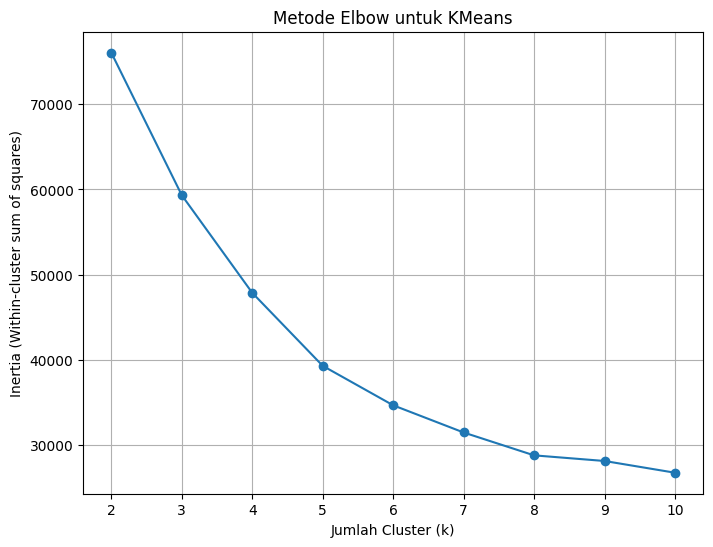

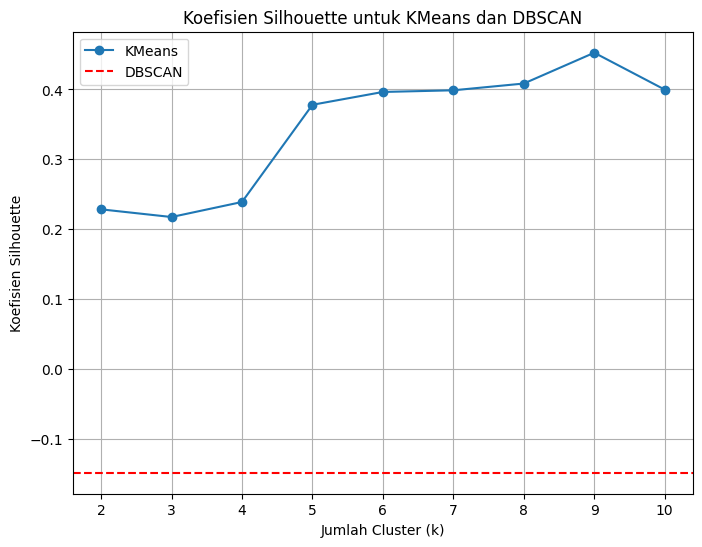

Indeks Calinski-Harabasz:
KMeans: [np.float64(560.9951144606445), np.float64(566.0503378476537), np.float64(502.456438649952), np.float64(720.8042497377594), np.float64(677.6182412947878), np.float64(643.5464513122416), np.float64(616.2756132944056), np.float64(751.7786930678776), np.float64(517.2294290921056)]
DBSCAN: 4.376853819924909

Indeks Davies-Bouldin:
KMeans: [np.float64(1.8749807821292712), np.float64(1.6945516239651515), np.float64(1.8256463505567675), np.float64(1.4792385545852262), np.float64(1.4090966251028239), np.float64(1.228671156751816), np.float64(1.1724896806675829), np.float64(0.9680588989407237), np.float64(1.3204139612646117)]
DBSCAN: 1.2614629706461984

Skor Silhouette:
KMeans: [np.float64(0.22849787349948555), np.float64(0.217521934692194), np.float64(0.23901687450490938), np.float64(0.37800812689897106), np.float64(0.39634527345603643), np.float64(0.39872436157809776), np.float64(0.40839772232832133), np.float64(0.45245071770503476), np.float64(0.399707684868

In [23]:
data_for_evaluation = processed_df.select_dtypes(include=np.number)

# Metode Elbow untuk menentukan jumlah cluster optimal pada KMeans
inertia_values = [kmeans_results[k].inertia_ for k in k_range]
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Metode Elbow untuk KMeans')
plt.grid(True)
plt.show()

silhouette_kmeans_scores = []
for n_clusters in k_range:
    current_kmeans_labels = processed_df[f'kmeans_cluster_k={n_clusters}']
    silhouette_kmeans_scores.append(silhouette_score(data_for_evaluation, current_kmeans_labels))

dbscan_cluster_labels = processed_df['dbscan_cluster_labels']
if len(set(dbscan_cluster_labels)) > 1 and -1 in dbscan_cluster_labels and len(set(dbscan_cluster_labels)) > 2:
     silhouette_dbscan_score = silhouette_score(data_for_evaluation[dbscan_cluster_labels != -1], dbscan_cluster_labels[dbscan_cluster_labels != -1])
elif len(set(dbscan_cluster_labels)) > 1 and -1 not in dbscan_cluster_labels:
     silhouette_dbscan_score = silhouette_score(data_for_evaluation, dbscan_cluster_labels)
else:
     silhouette_dbscan_score = -1
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_kmeans_scores, marker='o', label='KMeans')
if silhouette_dbscan_score != -1:
    plt.axhline(y=silhouette_dbscan_score, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Koefisien Silhouette')
plt.title('Koefisien Silhouette untuk KMeans dan DBSCAN')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi menggunakan Calinski-Harabasz Index
ch_kmeans_scores = []
for n_clusters in k_range:
    current_kmeans_labels = processed_df[f'kmeans_cluster_k={n_clusters}']
    ch_kmeans_scores.append(calinski_harabasz_score(data_for_evaluation, current_kmeans_labels))

# Menghitung Calinski-Harabasz Index untuk DBSCAN
if len(set(dbscan_cluster_labels)) > 1 and -1 not in dbscan_cluster_labels:
    ch_dbscan_score = calinski_harabasz_score(data_for_evaluation, dbscan_cluster_labels)
else:
    ch_dbscan_score = -1

# Evaluasi menggunakan Davies-Bouldin Index
db_kmeans_scores = []
for n_clusters in k_range:
    current_kmeans_labels = processed_df[f'kmeans_cluster_k={n_clusters}']
    db_kmeans_scores.append(davies_bouldin_score(data_for_evaluation, current_kmeans_labels))

# Menghitung Davies-Bouldin Index untuk DBSCAN
if len(set(dbscan_cluster_labels)) > 1 and -1 not in dbscan_cluster_labels:
    db_dbscan_score = davies_bouldin_score(data_for_evaluation, dbscan_cluster_labels)
else:
    db_dbscan_score = -1


print("Indeks Calinski-Harabasz:")
print("KMeans:", ch_kmeans_scores)
print("DBSCAN:", ch_dbscan_score)

print("\nIndeks Davies-Bouldin:")
print("KMeans:", db_kmeans_scores)
print("DBSCAN:", db_dbscan_score)

print("\nSkor Silhouette:")
print("KMeans:", silhouette_kmeans_scores)
print("DBSCAN:", silhouette_dbscan_score)

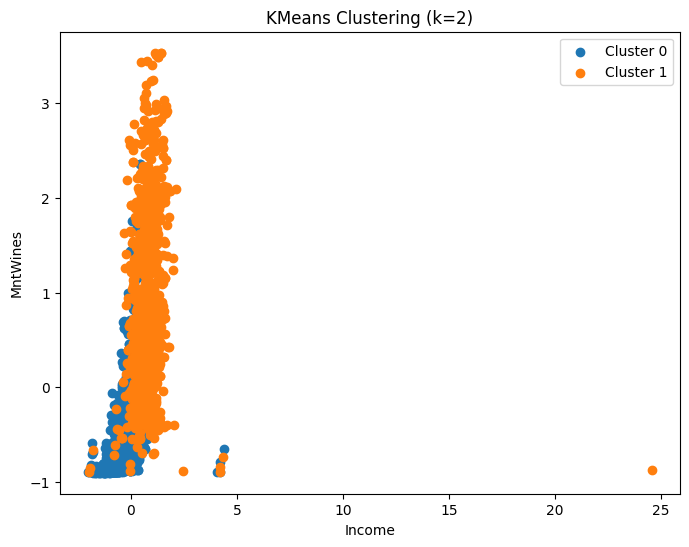

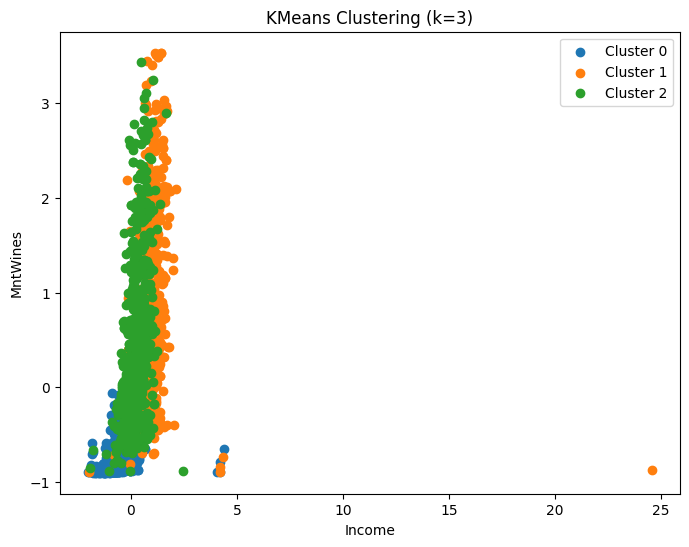

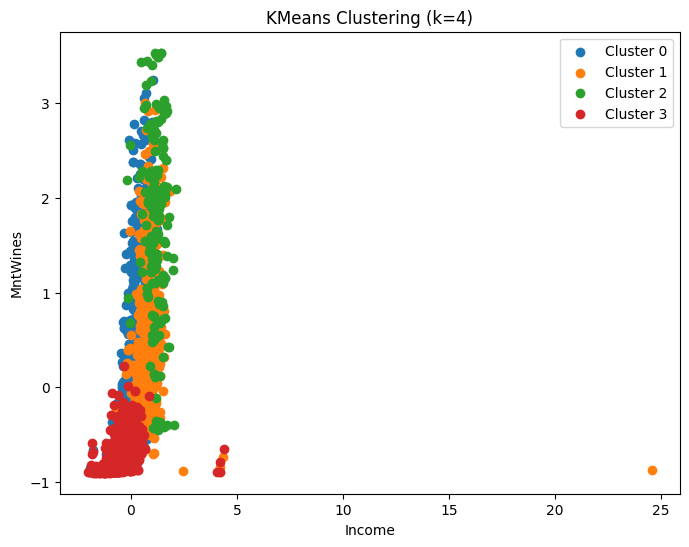

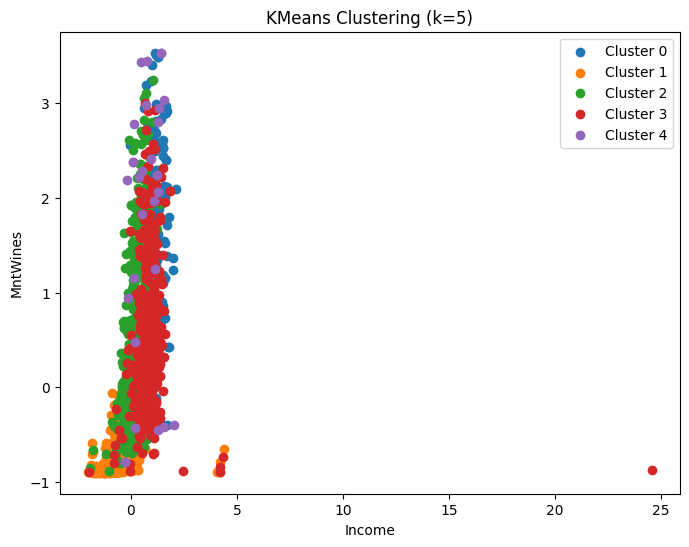

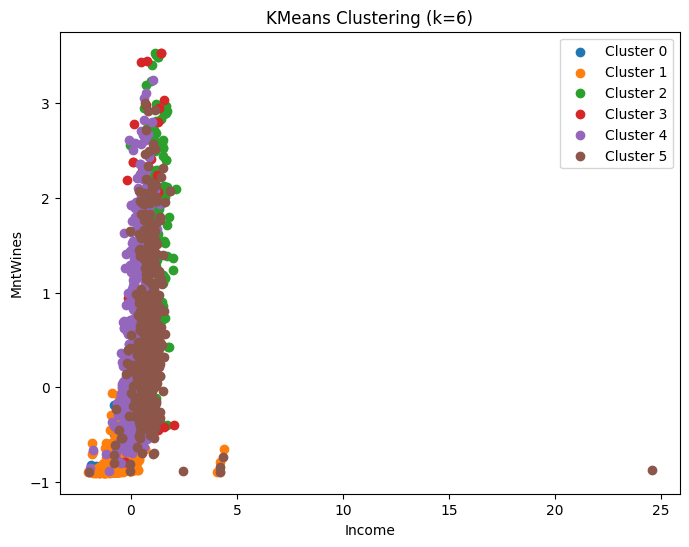

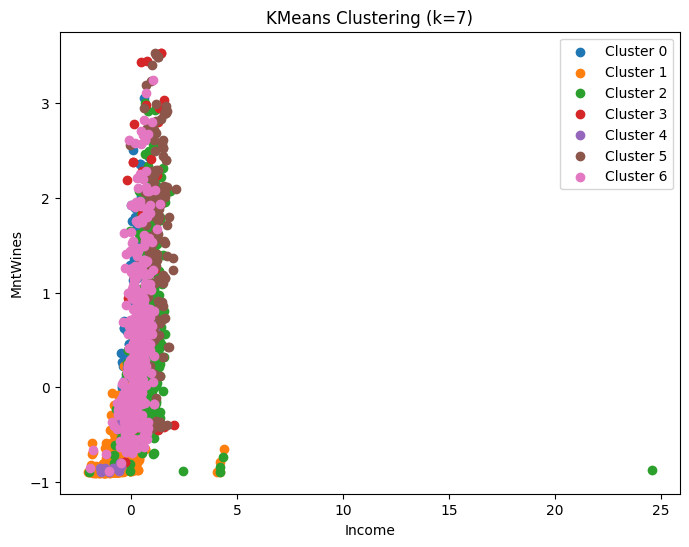

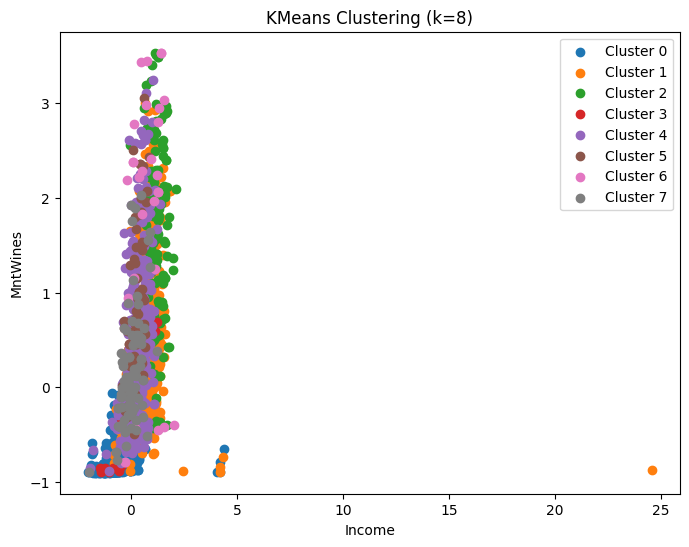

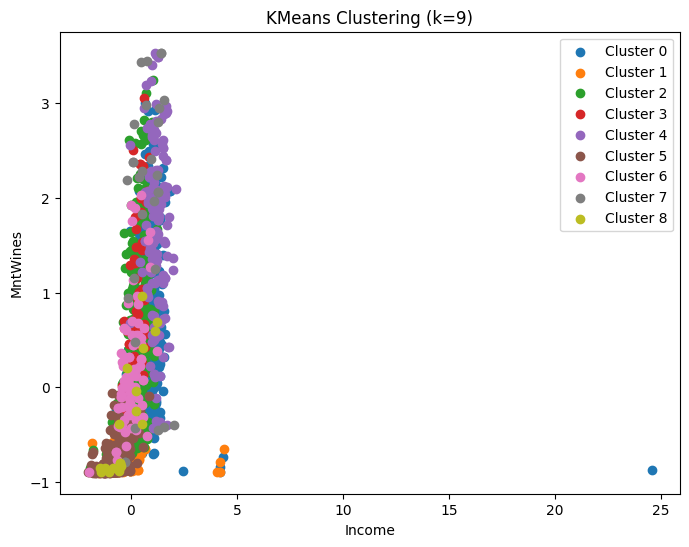

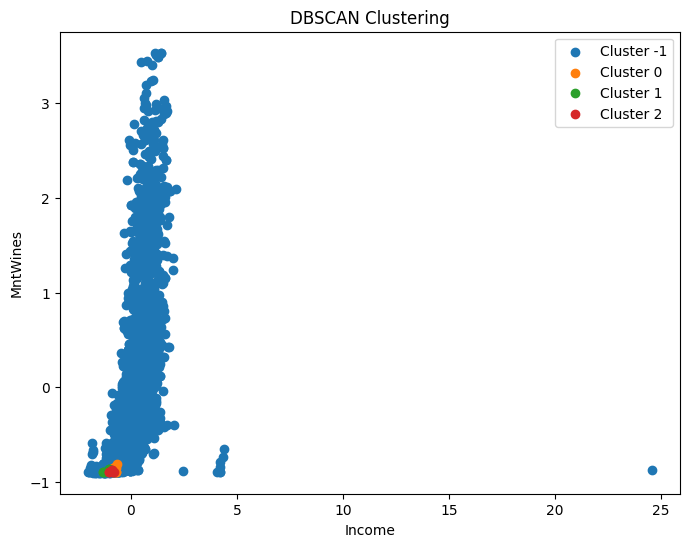

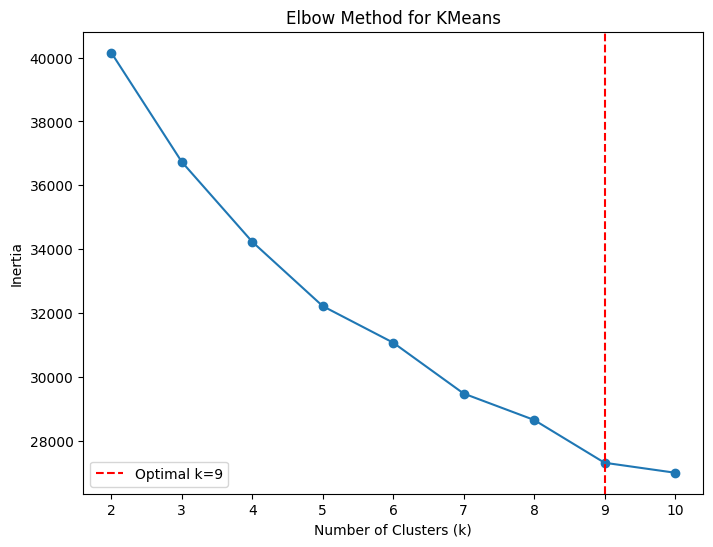

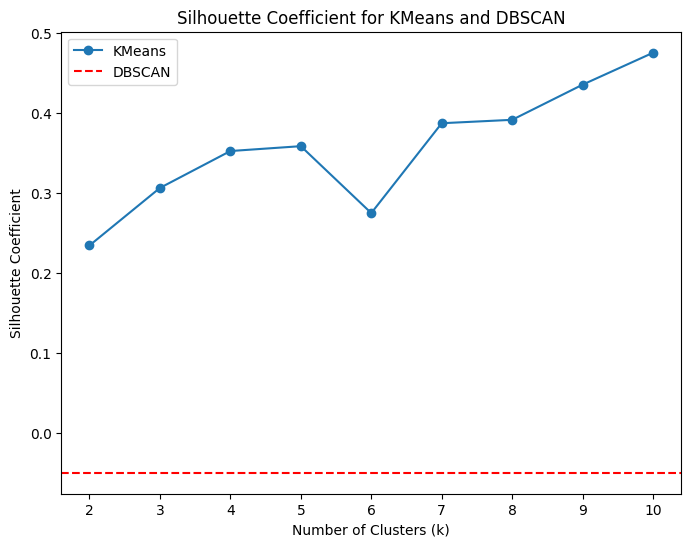

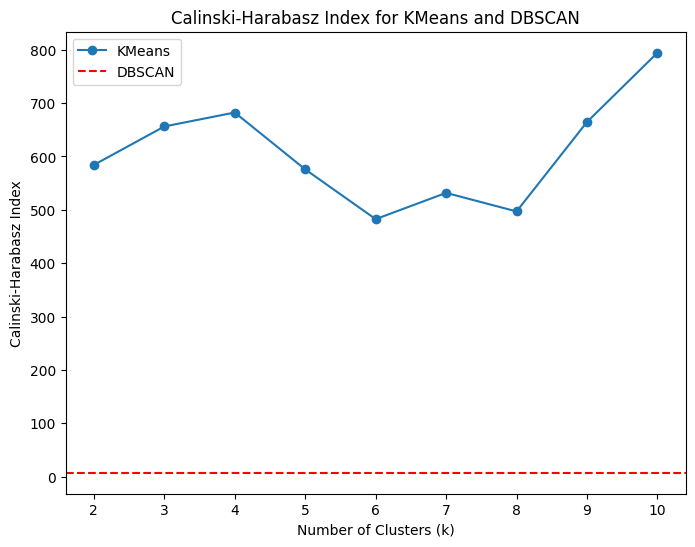

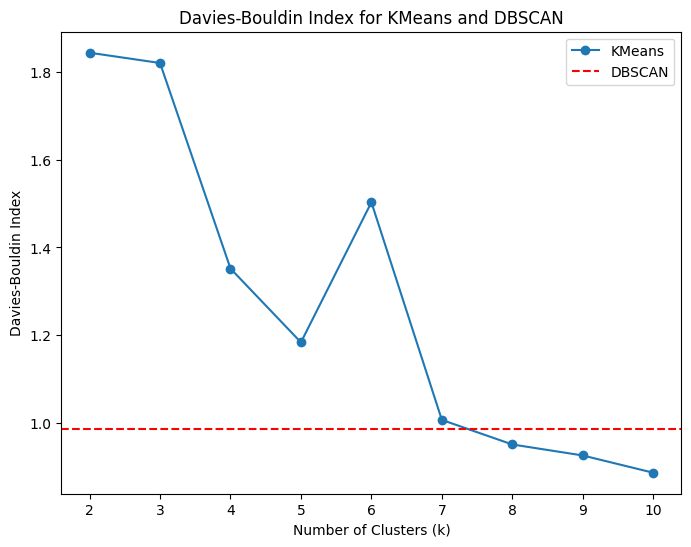

In [27]:
features_to_plot = ['Income', 'MntWines']

for k in range(2, 10):
    plt.figure(figsize=(8, 6))
    for cluster_label in np.unique(scaled_df[f'kmeans_labels_k={k}']):
        cluster_data = scaled_df[scaled_df[f'kmeans_labels_k={k}'] == cluster_label]
        plt.scatter(cluster_data[features_to_plot[0]], cluster_data[features_to_plot[1]], label=f'Cluster {cluster_label}')
    plt.xlabel(features_to_plot[0])
    plt.ylabel(features_to_plot[1])
    plt.title(f'KMeans Clustering (k={k})')
    plt.legend()
    plt.savefig(f'kmeans_k{k}_plot.png')
    plt.show()

# DBSCAN plot
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(scaled_df['dbscan_labels']):
    cluster_data = scaled_df[scaled_df['dbscan_labels'] == cluster_label]
    plt.scatter(cluster_data[features_to_plot[0]], cluster_data[features_to_plot[1]], label=f'Cluster {cluster_label}')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('DBSCAN Clustering')
plt.legend()
plt.savefig('dbscan_plot.png')
plt.show()


# 2. Visualisasi Evaluation Metrics
# Elbow Method
inertia_values = [kmeans_models[k].inertia_ for k in cluster_range]
optimal_k = 9
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.legend()
plt.savefig('elbow_plot.png')
plt.show()

# Silhouette Coefficient
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_kmeans, marker='o', label='KMeans')
plt.axhline(y=silhouette_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for KMeans and DBSCAN')
plt.legend()
plt.savefig('silhouette_plot.png')
plt.show()

# Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, ch_kmeans, marker='o', label='KMeans')
plt.axhline(y=ch_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for KMeans and DBSCAN')
plt.legend()
plt.savefig('calinski_harabasz_plot.png')
plt.show()

# Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, db_kmeans, marker='o', label='KMeans')
plt.axhline(y=db_dbscan, color='r', linestyle='--', label='DBSCAN')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for KMeans and DBSCAN')
plt.legend()
plt.savefig('davies_bouldin_plot.png')
plt.show()

saya mengevaluasi hasil klastering KMeans (k=2 hingga 10) dan DBSCAN menggunakan beberapa metrik:

*   **Metode Elbow (KMeans):** Menyarankan jumlah klaster sekitar 5 atau 6.
*   **Koefisien Silhouette:** Untuk KMeans, skor tertinggi pada k=8 dan k=9. DBSCAN memiliki skor rendah (-1).
*   **Indeks Calinski-Harabasz:** Untuk KMeans, skor tertinggi pada k=9. DBSCAN memiliki skor jauh lebih rendah.
*   **Indeks Davies-Bouldin:** Untuk KMeans, skor terendah (terbaik) pada k=9. DBSCAN memiliki nilai relatif rendah.

**Kesimpulan:**

Berdasarkan konsistensi hasil dari Koefisien Silhouette, Indeks Calinski-Harabasz, dan Indeks Davies-Bouldin, **KMeans dengan 9 klaster** adalah pilihan terbaik untuk segmentasi data ini, meskipun metode Elbow memberikan indikasi awal yang berbeda. DBSCAN kurang efektif untuk data ini dengan parameter yang digunakan.

Berikut adalah penjelasan mengenai beberapa konsep dan metrik yang digunakan dalam analisis klastering, beserta persamaannya:

### 1. StandardScaler

**StandardScaler** adalah metode pra-pemrosesan data yang digunakan untuk menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varians satuan. Tujuannya adalah untuk mengubah distribusi data sehingga memiliki rata-rata 0 dan standar deviasi 1. Standardisasi penting untuk algoritma yang sensitif terhadap skala fitur, seperti KMeans dan DBSCAN.

**Persamaan:**

Untuk setiap sampel $x_i$ dan rata-rata fitur $\mu$ serta standar deviasi fitur $\sigma$, nilai yang diskalakan ($z_i$) dihitung sebagai:

$$ z_i = \frac{x_i - \mu}{\sigma} $$

### 2. KMeans

**KMeans** adalah algoritma klastering partisional yang bertujuan untuk mempartisi dataset ke dalam $k$ klaster yang berbeda. Algoritma ini bekerja dengan mengiterasi dua langkah:

1.  **Penugasan Klaster:** Setiap titik data ditugaskan ke klaster yang pusatnya (centroid) terdekat.
2.  **Pembaruan Centroid:** Centroid untuk setiap klaster dihitung ulang sebagai rata-rata dari semua titik data yang ditugaskan ke klaster tersebut.

Proses ini diulang hingga penugasan klaster tidak berubah lagi atau jumlah iterasi maksimum tercapai. KMeans bertujuan untuk meminimalkan inersia (inertia), yaitu jumlah kuadrat jarak antara setiap titik data dan centroid klasternya.

**Persamaan (Inersia - Within-cluster sum of squares):**

$$ I = \sum_{i=1}^{n} \min_{j=1}^{k} \|x_i - c_j\|^2 $$

Di mana:
*   $n$ adalah jumlah titik data.
*   $k$ adalah jumlah klaster.
*   $x_i$ adalah titik data ke-$i$.
*   $c_j$ adalah centroid klaster ke-$j$.
*   $\|x_i - c_j\|^2$ adalah jarak Euclidean kuadrat antara titik data $x_i$ dan centroid $c_j$.

### 3. DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** adalah algoritma klastering berbasis kepadatan. Berbeda dengan KMeans, DBSCAN dapat menemukan klaster dengan bentuk arbitrer dan dapat mengidentifikasi outlier sebagai noise. Algoritma ini mengategorikan titik data menjadi tiga jenis:

*   **Core Points:** Titik yang memiliki setidaknya `min_samples` titik lain (termasuk dirinya sendiri) dalam jarak `eps`.
*   **Border Points:** Titik yang berada dalam jarak `eps` dari core point, tetapi tidak memiliki `min_samples` titik dalam jarak `eps` sendiri.
*   **Noise Points:** Titik yang bukan core point maupun border point.

Klaster dibentuk dengan menghubungkan core points yang berdekatan (dalam jarak `eps`) dan menyertakan border points yang terhubung dengan core points tersebut.

**Konsep Kepadatan:**

DBSCAN tidak memiliki satu persamaan global yang mengoptimalkan fungsi tujuan seperti KMeans. Algoritma ini didasarkan pada definisi kepadatan dan keterhubungan. Konsep utamanya adalah:

*   **$\epsilon$-neighborhood ($N_\epsilon(p)$):** Set semua titik dalam jarak $\epsilon$ dari titik $p$.
*   **Density Reachability:** Titik $p$ dapat dijangkau kepadatan (density-reachable) dari titik $q$ jika ada rantai titik $p_1, ..., p_n$ dengan $p_1 = q$ dan $p_n = p$, di mana setiap $p_{i+1}$ secara langsung dapat dijangkau kepadatan dari $p_i$, dan semua $p_i$ kecuali $p$ adalah core points.

### 4. Koefisien Silhouette

**Koefisien Silhouette** adalah metrik evaluasi yang mengukur seberapa baik setiap titik data masuk ke klasternya sendiri dan seberapa buruk masuk ke klaster tetangga. Nilai koefisien silhouette untuk titik data ke-$i$ dihitung sebagai:

**Persamaan:**

$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$

Di mana:
*   $a_i$ adalah jarak rata-rata titik $i$ ke semua titik lain di klaster yang sama.
*   $b_i$ adalah jarak rata-rata titik $i$ ke semua titik di klaster terdekat (klaster lain yang bukan klasternya sendiri, dengan jarak rata-rata terdekat).

Nilai rata-rata koefisien silhouette untuk semua titik data digunakan untuk mengevaluasi kualitas klastering secara keseluruhan. Skor berkisar dari -1 (klastering buruk) hingga +1 (klastering baik), dengan 0 menunjukkan klaster yang tumpang tindih.

### 5. Indeks Calinski-Harabasz

**Indeks Calinski-Harabasz** (CH) adalah metrik evaluasi internal yang mengukur rasio varians antar klaster terhadap varians dalam klaster. Skor yang lebih tinggi menunjukkan klaster yang lebih baik dan terpisah.

**Persamaan:**

$$ CH = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N - k}{k - 1} $$

Di mana:
*   $N$ adalah jumlah total titik data.
*   $k$ adalah jumlah klaster.
*   $Tr(B_k)$ adalah trace dari matriks kovarians antar klaster (ukuran seberapa tersebarnya centroid klaster).
*   $Tr(W_k)$ adalah trace dari matriks kovarians dalam klaster (ukuran seberapa padat klaster).

### 6. Indeks Davies-Bouldin

**Indeks Davies-Bouldin** (DB) adalah metrik evaluasi internal lainnya yang mengukur rata-rata kesamaan antara setiap klaster dengan klaster yang paling mirip dengannya. Kesamaan di sini diukur berdasarkan jarak antara centroid klaster dan ukuran dispersi klaster. Nilai yang lebih rendah menunjukkan klaster yang lebih baik, dengan klaster yang lebih padat dan terpisah satu sama lain.

**Persamaan:**

$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$

Di mana:
*   $k$ adalah jumlah klaster.
*   $\sigma_i$ adalah ukuran dispersi klaster ke-$i$ (misalnya, rata-rata jarak titik-titik dalam klaster ke centroidnya).
*   $\sigma_j$ adalah ukuran dispersi klaster ke-$j$.
*   $d(c_i, c_j)$ adalah jarak antara centroid klaster ke-$i$ dan centroid klaster ke-$j$.